In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [4]:
data.head(8)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


In [5]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


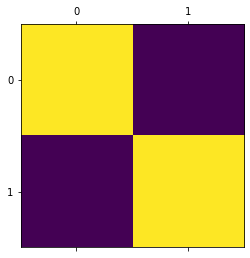

In [10]:
plt.matshow(data.corr())
plt.show()
#the below plot shows that the two variables are highly correlated  

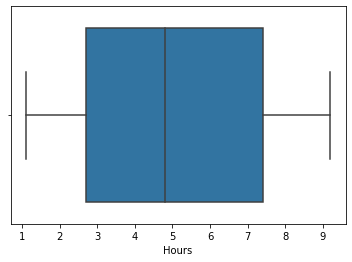

In [14]:
sns.boxplot(x=data['Hours'])

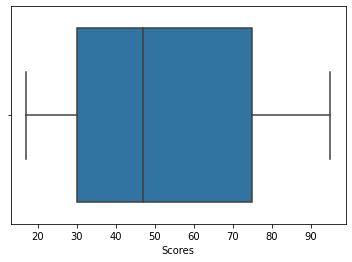

In [15]:
sns.boxplot(x=data['Scores'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


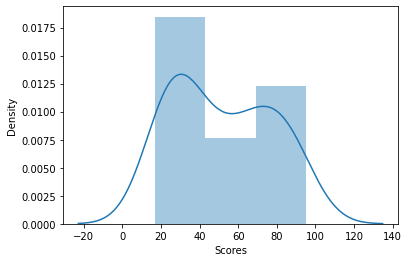

In [16]:
sns.distplot(data['Scores'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


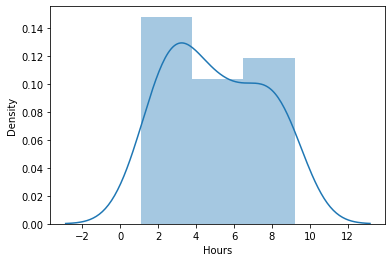

In [17]:
sns.distplot(data['Hours'])
plt.show()

In [19]:
#Linear Regression

In [36]:
x=data.drop(['Scores'],axis=1)
y=data.Scores

In [37]:
x

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [38]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [39]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [40]:
model = LinearRegression()

In [41]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
print(model.coef_)

[9.78856669]


In [44]:
print(model.intercept_)

2.3708153823418883


In [45]:
line = model.coef_*x+model.intercept_

<function matplotlib.pyplot.show>

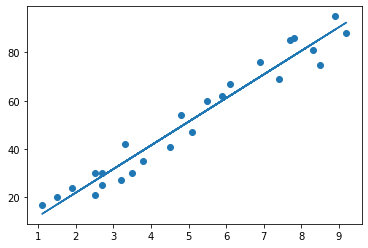

In [46]:
plt.scatter(x,y)
plt.plot(x,line);
plt.show

In [48]:
##Predictions

In [50]:
pred= model.predict(X_test)

In [51]:
pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [56]:
results = pd.DataFrame({'Actual': y_test,'Predicted':pred})

In [57]:
results

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


In [59]:
#Evaluation
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,pred))

Mean Absolute Error: 4.419727808027651


In [60]:
#Predicted score for a student studying 9.25 hours a day

In [63]:
pred_score = model.predict([[9.25]])

In [64]:
pred_score

array([92.91505723])